# Машинное обучение, ФКН ВШЭ

# Практическое задание 7. Бустинговое

## Общая информация

Дата выдачи: 13.12.2022

Мягкий дедлайн: 20.12.2022 23:59 MSK

Жёсткий дедлайн: 20.12.2022 23:59 MSK

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-07-Username.ipynb

Username — ваша фамилия на латинице

## О задании

В этом задании вам предстоит вручную запрограммировать один из самых мощных алгоритмов машинного обучения — бустинг.

In [ ]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn.ensemble
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split


sns.set(style='darkgrid')
filterwarnings('ignore')

In [ ]:
x = load_npz('x.npz')
y = np.load('y.npy')

Разделим на обучающую, валидационную и тестовую выборки (`random_state` оставьте равным 1337 для воспроизводимости).

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1337)

x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size=0.5, random_state=1337)

x_train.shape, x_valid.shape, x_test.shape

((18825, 169), (2354, 169), (2353, 169))

## Задание 1. Реализация градиентного бустингового (4 балла)

Вам нужно дописать код в файлике `boosting.py`. Для вас уже подготовлен шаблон класса `Boosting`, вы можете менять его по своему усмотрению.

### Инструкции для функций:

#### `__init__`

В `__init__` приходит кучка параметров, распишем что есть что:

 - `base_model_class` - класс базовой модели нашего бустинга
 - `base_model_params` - словарь с гиперпараметрами для базовой модели
 - `n_estimators` - какое количество базовых моделей нужно обучить
 - `learning_rate` - темп обучения, должен быть из полуинтервала $(0, 1]$
 - `subsample` - доля объектов, на которой будет обучаться базовая модель (какую часть составляет бутстрапная выборка от исходной обучающей)
 - `early_stopping_rounds` - число итераций, после которых при отсутствии улучшения качества на валидационной выборке обучение останавливается
 - `plot` - строить ли после обучения всех базовых моделей график с качеством

#### `fit`

В `fit` приходит две выборки, обучающая и валидационная. На обучающей мы обучаем новые базовые модели, на валидационной считаем качество для ранней остановки (если это предусматривают параметры).

Сначала нам нужно сделать какую-то нулевую модель, сделать предсказания для обучающей и валидационной выборок (в шаблоне это нулевая модель, соответственно предсказания это просто `np.zeros`). После этого нужно обучить `n_estimators` базовых моделей (как и на что обучаются базовые модели смотрите в лекциях и семинарах). После каждой обученной базовой модели мы должны обновить текущие предсказания, посчитать ошибку на обучающей и валидационной выборках (используем `loss_fn` для этого), проверить на раннюю остановку.

После всего цикла обучения надо нарисовать график (если `plot`).


#### `fit_new_base_model`

В `fit_new_base_model` приходит обучающая выборка (целиком) и текущие предсказания для неё. Мы должны сгенерировать бутстрап выборку для обучения базовой модели и обучить базовую модель. После обучения модели запускаем поиск оптимальной гаммы, добавляем новую модель и гамму (не забываем про темп обучения) в соответствующие списки.

#### `predict_proba`

В `predict_proba` приходит выборка, нужно предсказать вероятности для неё. Суммируем предсказания базовых моделей на этой выборке (не забываем про гаммы) и накидываем сигмоиду.

In [ ]:
%load_ext autoreload

In [ ]:
%autoreload 2

from boosting import Boosting

### Проверка кода

У автора задания всё учится около одной секунды.

In [ ]:
boosting = Boosting()

%time boosting.fit(x_train, y_train, x_valid, y_valid)

assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(x_test).shape == (x_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

CPU times: user 884 ms, sys: 9.02 ms, total: 893 ms
Wall time: 897 ms
Train ROC-AUC 0.9891
Valid ROC-AUC 0.9104
Test ROC-AUC 0.9142


## Задание 2. Обучение градиентного бустингового (1 балл)

Оцените качество на тестовой выборке вашей имплементации бустинга для различной максимальной глубины решающего дерева в качестве базовой модели. Здесь и далее мы будем использовать метрику ROC-AUC.

Перебирайте максимальную глубину от 1 до 30 с шагом 2 (остальные параметры бустинга стоит оставить равными по умолчанию). Постройте график зависимости качества на обучающей и тестовой выборке в зависимости от глубины.

{'max_depth 9': 0.9362174728359703, 'max_depth 7': 0.9327193315310577, 'max_depth 11': 0.9298151696600501, 'max_depth 5': 0.9284402391347818, 'max_depth 13': 0.9279734004279487, 'max_depth 15': 0.9248740007841001, 'max_depth 17': 0.9186657545073947, 'max_depth 3': 0.9180084015222248, 'max_depth 23': 0.9174553590406898, 'max_depth 19': 0.9143882366092866, 'max_depth 29': 0.9111526428739002, 'max_depth 21': 0.9109766927036181, 'max_depth 25': 0.9084275801695105, 'max_depth 27': 0.9070557986405783, 'max_depth 1': 0.8327068142706214}


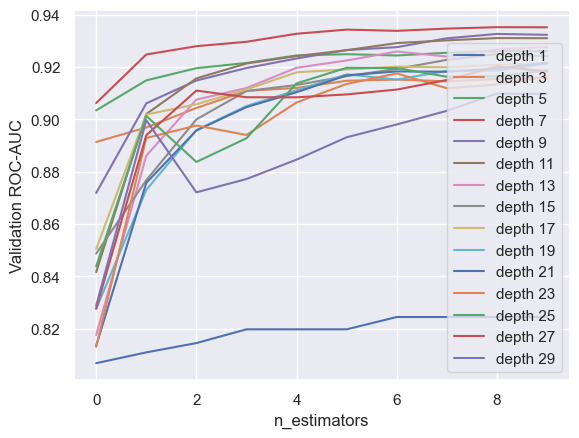

In [ ]:
results = {}

depths = range(1, 30, 2)

for i in depths:
    boosting = Boosting(base_model_params={"max_depth" : i},
                        plot=True)
    boosting.fit(x_train, y_train, x_valid, y_valid)
    results[f"max_depth {i}"] = boosting.score(x_test, y_test)
plt.legend([f"depth {i}" for i in depths])
print(dict(sorted(results.items(), key=lambda x_: x_[1], reverse=True)))

**Какая из моделей имеет лучшее качество? Как вы можете это объяснить?**

**Ответ: Ну в данном конкретном случае лучше всего себя ведет, модель с глубиной 9, вероятно, потому что она оптимальна с точки зрения переобучения - модель не слишком легкая, но и не слишком сложная**

## Задание 3. Подбираем гиперпараметры и ищем лучшую модель (3 балла)

Подберите по валидационной выборке основные гиперпараметры для вашей модели бустинга. Следует подобрать все основные параметры для самого градиентного бустинга и для самих базовых моделей. Существуют библиотеки для подбора гиперпараметров, попробуйте использовать какую-нибудь из следующих двух - [Hyperopt](https://github.com/hyperopt/hyperopt), [Optuna](https://optuna.org/).

In [ ]:
import optuna

In [ ]:
# 1. Define an objective function to be maximized.
def objective(trial):
    tree_max_depth = trial.suggest_int('rf_max_depth', 2, 32, log=True)
    boost_n_estim = trial.suggest_int('n_estimator', 1, 30, log=True)
    boost_learning_rate = trial.suggest_float("learning_rate", 0.1, 1, log=True)
    boost_early_stop = trial.suggest_int("early_stop", 1, 10, log=True)
    boost_subsample = trial.suggest_float("subsample", 0.1, 1, log=True)
    tree_min_samples_lf = trial.suggest_int("lf", 1, 20, log=True)
    tree_min_samples_spl = trial.suggest_int("spl", 2, 20, log=True)

    base_model_par = {"max_depth": tree_max_depth,
                      "min_samples_leaf": tree_min_samples_lf,
                      "min_samples_split": tree_min_samples_spl}

    classifier_obj = Boosting(base_model_params=base_model_par,
                              n_estimators=boost_n_estim,
                              learning_rate=boost_learning_rate,
                              early_stopping_rounds=boost_early_stop,
                              subsample=boost_subsample)
    classifier_obj.fit(x_train, y_train, x_valid, y_valid)
    score = classifier_obj.score(x_valid, y_valid)
    return score


# 3. Create a study object and optimize the objective function.
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2022-12-20 21:47:43,069] A new study created in memory with name: no-name-1de9cc0c-2eb6-42e9-b091-67b9edd301b4
[I 2022-12-20 21:47:43,355] Trial 0 finished with value: 0.927019403224532 and parameters: {'rf_max_depth': 5, 'n_estimator': 8, 'learning_rate': 0.11403072962911602, 'early_stop': 1, 'subsample': 0.255584341938514, 'lf': 1, 'spl': 2}. Best is trial 0 with value: 0.927019403224532.
[I 2022-12-20 21:47:43,438] Trial 1 finished with value: 0.9209495599174032 and parameters: {'rf_max_depth': 9, 'n_estimator': 2, 'learning_rate': 0.28160435420024077, 'early_stop': 4, 'subsample': 0.24825360037106353, 'lf': 11, 'spl': 15}. Best is trial 0 with value: 0.927019403224532.
[I 2022-12-20 21:47:43,469] Trial 2 finished with value: 0.8998182519138623 and parameters: {'rf_max_depth': 5, 'n_estimator': 1, 'learning_rate': 0.2445131220285687, 'early_stop': 1, 'subsample': 0.12960911191272798, 'lf': 10, 'spl': 7}. Best is trial 0 with value: 0.927019403224532.
[I 2022-12-20 21:47:44,034] T

In [ ]:
study.best_params
study.best_trial.value

0.9409821580370249

## Задание 4. Интерпретация бустингового (2 балл)

Постройте калибровочную кривую для вашей лучшей модели бустинга. Насколько хорошо бустинг оценивает вероятности? Постройте также калибровочную кривую для логистической регрессии, сравните их между собой. Проанализируйте полученные результаты.

In [ ]:
from sklearn.linear_model import LogisticRegression
def plot_calibration_curve(y_test, preds, name):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 10
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append((r + l) / 2)
        bin_real_ratios.append(np.mean(y_test[(preds >= l) & (preds < r)] == 1))
    plt.figure(figsize=(6,6))
    plt.title(name)
    plt.plot(bin_middle_points, bin_real_ratios)
    plt.plot(bin_middle_points, bin_middle_points)
    plt.ylim([-0.05, 1.05])
    plt.grid()

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)
lr_probs = model.predict_proba(x_test)[:, 1]
boosting = Boosting(n_estimators=29,
                    early_stopping_rounds=6,
                    subsample=0.44,
                    learning_rate=0.35,
                    base_model_params={"max_depth" : 7,
                                       "min_samples_leaf" : 3,
                                       "min_samples_split" : 14,
                                       })
boosting.fit(x_train, y_train, x_valid, y_valid)
boost_probs = boosting.predict_proba(x_test)[:, 1]

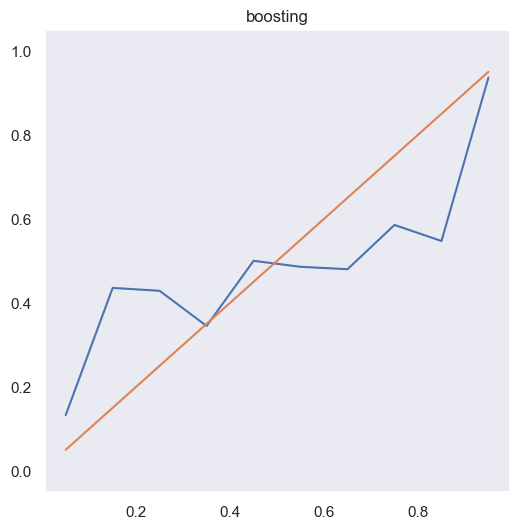

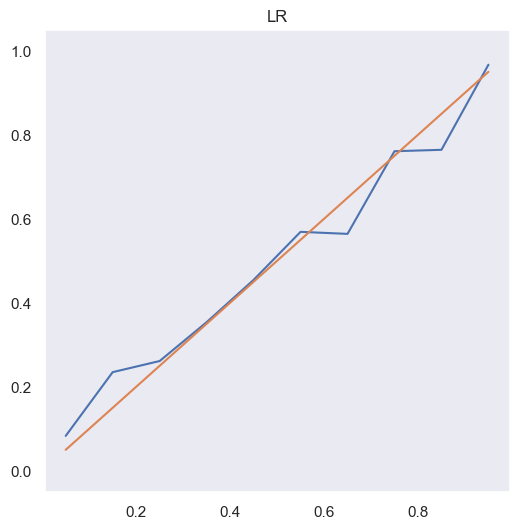

In [ ]:
plot_calibration_curve(y_test, boost_probs, name="boosting")
plot_calibration_curve(y_test, lr_probs, name="LR")

Теперь попробуем оценить важность признаков для бустинга.

Поскольку наша базовая модель - это дерево из `sklearn`, мы можем вычислить важность признака отдельно для каждого дерева и усреднить (воспользуйтесь `feature_importances_` у `DecisionTreeRegressor`), после этого нормировать значения, чтобы они суммировались в единицу (обратите внимание, что они должны быть неотрицательными - иначе вы что-то сделали не так).

Допишите в вашей реализации бустинга функцию `feature_importances_` чтобы она возвращала описанные выше важности признаков.

Нарисуйте столбчатую диаграмму важности признаков. На соседнем графике нарисуйте важность признаков для логистической регрессии, для этого используйте модули весов. Сравните графики. Проанализируйте полученные результаты.

<BarContainer object of 169 artists>

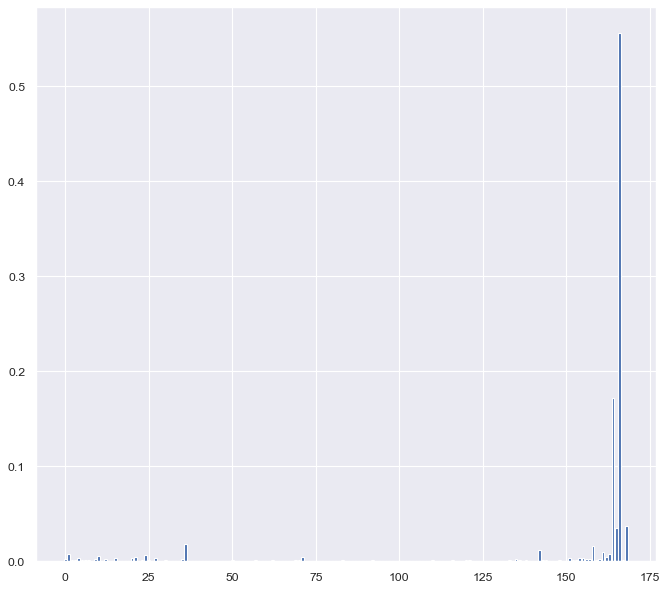

In [ ]:
plt.figure(figsize=(10, 9), dpi=80)
plt.bar(range(len(boosting.feature_importances_)), boosting.feature_importances_)

**За счет простоты моделей, бустинг не замечает закономерности и не вытаскивает важные данные из первых признаков, как это делает ЛогРег на графике ниже**

<BarContainer object of 169 artists>

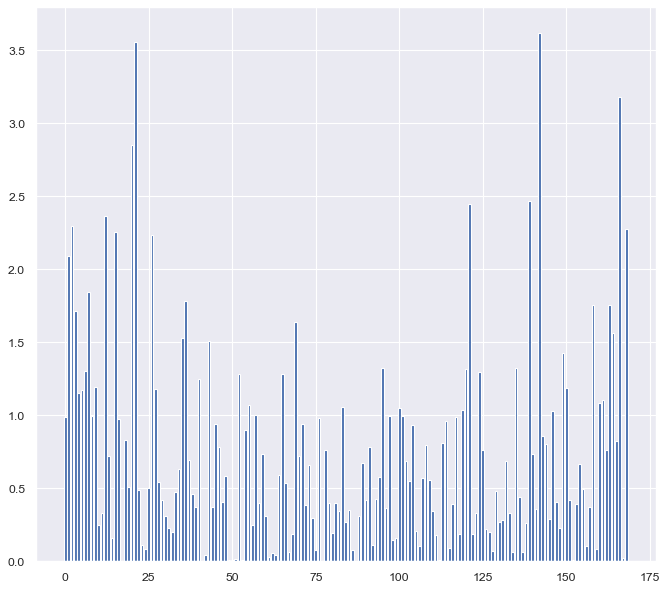

In [ ]:
plt.figure(figsize=(10, 9), dpi=80)
c = np.abs(model.coef_.reshape((-1,)))
plt.bar(range(len(c)), c)

Кстати, чаще всего излишние признаки могут вредить качеству бустинга. Попробуйте отфильтровать на основании диаграммы хвост наименее важных признаков и снова обучить модель (с теми же гиперпараметрами). Стало ли лучше?

In [ ]:
x_train_ = x_train[140:, :]
y_train_ = y_train[140:]
x_valid_ = x_valid[140:, :]
y_valid_ = y_valid[140:]

In [ ]:
boosting = Boosting(n_estimators=29,
                    early_stopping_rounds=6,
                    subsample=0.44,
                    learning_rate=0.35,
                    base_model_params={"max_depth" : 7,
                                       "min_samples_leaf" : 3,
                                       "min_samples_split" : 14,
                                       })
boosting.fit(x_train_, y_train_, x_valid_, y_valid_)
boosting.score(x_test, y_test)

0.9395042377618193

**Стало на тысячную долю хуже, но если честно, уверен, что на работе не поймут что стало хуже... Да и я просто хочу пива**

## Задание 5 (бонус). Блендинговое (1 балл)

Реализуйте блендинг над вашей лучшей моделью и логистической регрессией. Улучшилось ли качество?

In [ ]:
from sklearn.ensemble import StackingClassifier


## Задание 6 (бонус). Катбустовое (1 балл)

Запустите [CatBoost](https://catboost.ai/en/docs/concepts/python-quickstart) на наших данных, сравните с вашей реализацией. Где получилось лучше?

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
model = CatBoostClassifier(iterations=100,
                           depth=7,
                           learning_rate=0.1,
                           loss_function='Logloss')
model.fit(x_train, y_train)
print(f"Score: {model.score(x_test, y_test)}")

0:	learn: 0.5804343	total: 15.7ms	remaining: 1.56s
1:	learn: 0.4996831	total: 21.7ms	remaining: 1.06s
2:	learn: 0.4395496	total: 26.9ms	remaining: 871ms
3:	learn: 0.3983473	total: 32.9ms	remaining: 789ms
4:	learn: 0.3687931	total: 40ms	remaining: 760ms
5:	learn: 0.3481497	total: 46.2ms	remaining: 725ms
6:	learn: 0.3301934	total: 53.4ms	remaining: 710ms
7:	learn: 0.3174651	total: 61.6ms	remaining: 708ms
8:	learn: 0.3058043	total: 67.5ms	remaining: 683ms
9:	learn: 0.2982459	total: 74.1ms	remaining: 666ms
10:	learn: 0.2906597	total: 81ms	remaining: 655ms
11:	learn: 0.2830233	total: 89ms	remaining: 653ms
12:	learn: 0.2768380	total: 96.9ms	remaining: 648ms
13:	learn: 0.2723844	total: 104ms	remaining: 640ms
14:	learn: 0.2669310	total: 111ms	remaining: 630ms
15:	learn: 0.2630793	total: 118ms	remaining: 620ms
16:	learn: 0.2589097	total: 126ms	remaining: 614ms
17:	learn: 0.2554656	total: 134ms	remaining: 611ms
18:	learn: 0.2524264	total: 142ms	remaining: 604ms
19:	learn: 0.2491064	total: 153ms	

0.8737781555461114

Яндекс соснул.

In [ ]:
def catboost_(trial):
    n_estimators = trial.suggest_int("n_estimators", 5, 21, step=5)
    learning_rate = trial.suggest_float("learning_rate", 0.02, 0.2)
    subsample = trial.suggest_float("subsample", 0.1, 0.5)
    early_stopping_rounds = trial.suggest_int("early_stopping_rounds", 1, 10, step=1)

    max_depth = trial.suggest_int("max_depth", 5, 11, step=1)
    min_data_in_leaf = trial.suggest_int("min_data_in_leaf", 1, 3, step=1)

    model = CatBoostClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        subsample=subsample,
        early_stopping_rounds=early_stopping_rounds,
        max_depth=max_depth,
        min_data_in_leaf=min_data_in_leaf,
        verbose=False
    )
    model.fit(x_train, y_train)

    return -model.score(x_valid, y_valid)


study = optuna.create_study()
study.optimize(catboost_, n_trials=100)

[I 2022-12-20 21:46:16,723] A new study created in memory with name: no-name-c9d0a592-bf32-4229-9162-015bd2b61640
[I 2022-12-20 21:46:16,777] Trial 0 finished with value: -0.8474936278674596 and parameters: {'n_estimators': 5, 'learning_rate': 0.03032133118854384, 'subsample': 0.25121241832343033, 'early_stopping_rounds': 3, 'max_depth': 5, 'min_data_in_leaf': 1}. Best is trial 0 with value: -0.8474936278674596.
[I 2022-12-20 21:46:16,966] Trial 1 finished with value: -0.8780798640611724 and parameters: {'n_estimators': 20, 'learning_rate': 0.14755722003537777, 'subsample': 0.39782603394987237, 'early_stopping_rounds': 3, 'max_depth': 9, 'min_data_in_leaf': 3}. Best is trial 1 with value: -0.8780798640611724.
[I 2022-12-20 21:46:18,094] Trial 2 finished with value: -0.8763806287170773 and parameters: {'n_estimators': 20, 'learning_rate': 0.09254975873204264, 'subsample': 0.3975293756914777, 'early_stopping_rounds': 8, 'max_depth': 11, 'min_data_in_leaf': 1}. Best is trial 1 with value:

In [ ]:
print(study.best_params)
print(f"Score: {-study.best_trial.value}")

{'n_estimators': 20, 'learning_rate': 0.15878497004293768, 'subsample': 0.2979694135815943, 'early_stopping_rounds': 6, 'max_depth': 11, 'min_data_in_leaf': 2}
Score: 0.8802039082412915


Точно соснул)

## Социализационный бонус. Новогоднее 🎆 (0.5 балла)

Сфотографируйтесь с наряженной новогодней или рождественской ёлкой! Приложите фотографию, опишите свои впечатления, чего вы ждете от нового 2023 года?